In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

In [35]:
churn_data = pd.read_csv('data/churn1.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [36]:
pie_data = churn_data.groupby('Exited', as_index=False).count()
fig = px.pie(pie_data, values='RowNumber', names=['лояльный клиент','ушедший клиент'], title='Cоотношение ушедших и лояльных клиентов')
fig.show()

ушло только 20,4% от суммарного количества клиентов банка, пока сложно сказать много это или мало. необходим дальнейший анализ

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

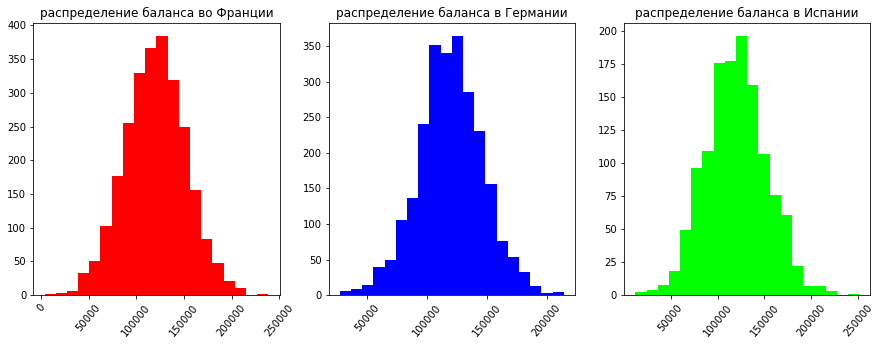

In [38]:
France_data = churn_data[churn_data['Geography'] == 'France']
France_data = France_data[France_data['Balance']>=2500]
France_data_male = France_data[France_data['Gender']=='Male']
France_data_female = France_data[France_data['Gender']=='Female']
Germany_data = churn_data[churn_data['Geography'] == 'Germany']
Germany_data = Germany_data[Germany_data['Balance']>=2500]
Spain_data = churn_data[churn_data['Geography'] == 'Spain']
Spain_data = Spain_data[Spain_data['Balance']>=2500]

#визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

#гистограмма
axes[0].hist(x=France_data['Balance'],
             label=['количество человек в категории'], 
             color='red', bins = 20)
axes[0].set_title('распределение баланса во Франции');
axes[0].xaxis.set_tick_params(rotation=50)



#гистограмма
axes[1].hist(x=Germany_data['Balance'],
             label=['количество человек в категории'], 
             color='blue', bins = 20)
axes[1].set_title('распределение баланса в Германии');
axes[1].xaxis.set_tick_params(rotation=50)


#гистограмма
axes[2].hist(x=Spain_data['Balance'],
             label=['количество человек в категории'], 
             color='lime', bins = 20)
axes[2].set_title('распределение баланса в Испании');
axes[2].xaxis.set_tick_params(rotation=50)



доля группы 2500+ 0.6383


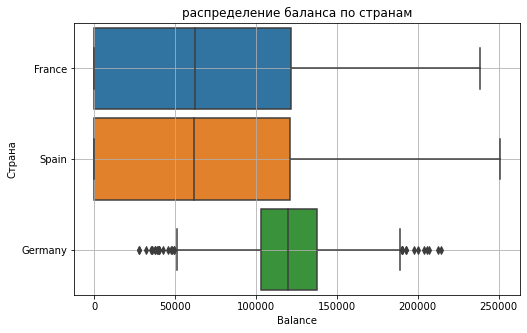

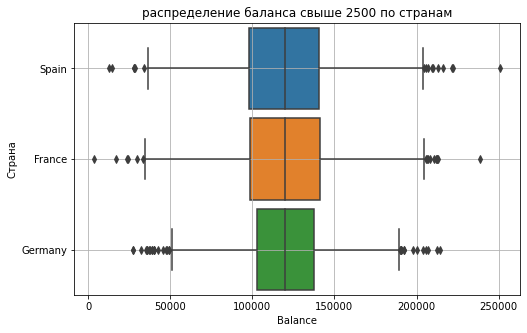

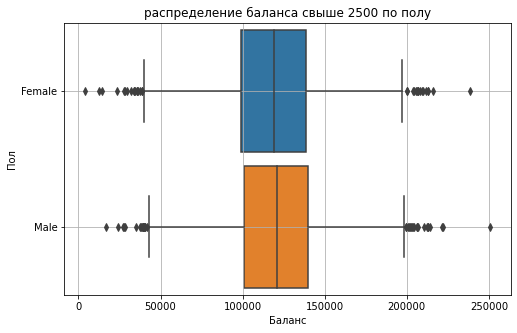

In [46]:
#fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 4))

fig = plt.figure(figsize=(8, 5))

boxplot = sns.boxplot(
    data=churn_data,
    y='Geography',
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.set_title('распределение баланса по странам');
boxplot.set_xlabel('Balance');
boxplot.set_ylabel('Страна');
boxplot.grid()

churn_data_2500=churn_data[churn_data['Balance']>=2500]
fig = plt.figure(figsize=(8, 5))
boxplot = sns.boxplot(
    data=churn_data_2500,
    y='Geography',
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.set_title('распределение баланса свыше 2500 по странам');
boxplot.set_xlabel('Balance');
boxplot.set_ylabel('Страна');
boxplot.grid()

churn_data_2500=churn_data[churn_data['Balance']>=2500]
fig = plt.figure(figsize=(8, 5))
boxplot = sns.boxplot(
    data=churn_data_2500,
    y='Gender',
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.set_title('распределение баланса свыше 2500 по полу');
boxplot.set_xlabel('Баланс');
boxplot.set_ylabel('Пол');
boxplot.grid()




print('доля группы 2500+', churn_data_2500['Balance'].count()/churn_data['Balance'].count())

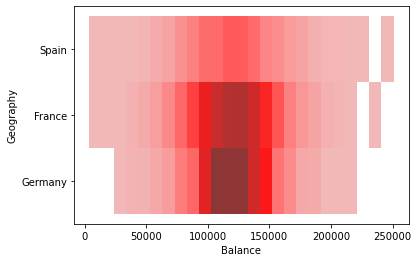

In [45]:
sns.histplot(
    data= churn_data_2500,
    x='Balance',
    y='Geography',
    bins=25,
    color='red',
);

исследование проведено в разрезе стран. распределение категорий по статье "Баланс" похоже на нормальное во всех трех странах. При этом  во Франции и Испании - менее сконцентрированное распределение, чем в Германии и в этих странах наблюдаются наиболее значительные выбросы. обращает на себя внимание тот факт, что в диапазоне "баланс более 2500" наблюдается один уровень медианы 120 000 eur. однако, я не могу не подчеркнуть тот факт, что на долю группы "баланс свыше 2500" приходится только 63% совокупного объема клиентов. распределение объего пула клиентов имеет более существенные отличия (значительно более низкая медиана во Франции и в Испании). то в плане работы с клиентами сегмента "2500+" в Германии следует рассмотреть более индивидуальный подход к данным клиентам, т.к. концентрация капитала выше.

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [ ]:
#визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
#гистограмма
axes[0].hist(x=France_data_male['Balance'],
             label=['количество человек в категории'], 
             color='red', bins = 20)
axes[0].set_title('распределение баланса во Франции');
axes[0].xaxis.set_tick_params(rotation=50)

In [48]:
churn_data.groupby(['Geography'])[churn_data['Balance']>=2500].plot(kind='bar')

KeyError: 'Columns not found: False, True'

In [ ]:
jointplot = sns.jointplot(
    data=churn_data_2500, 
    x='Balance', 
    y='Age',
    hue='Geography',
    xlim = (0, 4000),
    ylim = (0, 100),
    height=500,
)

Text(0, 0.5, 'Длина крыльев')

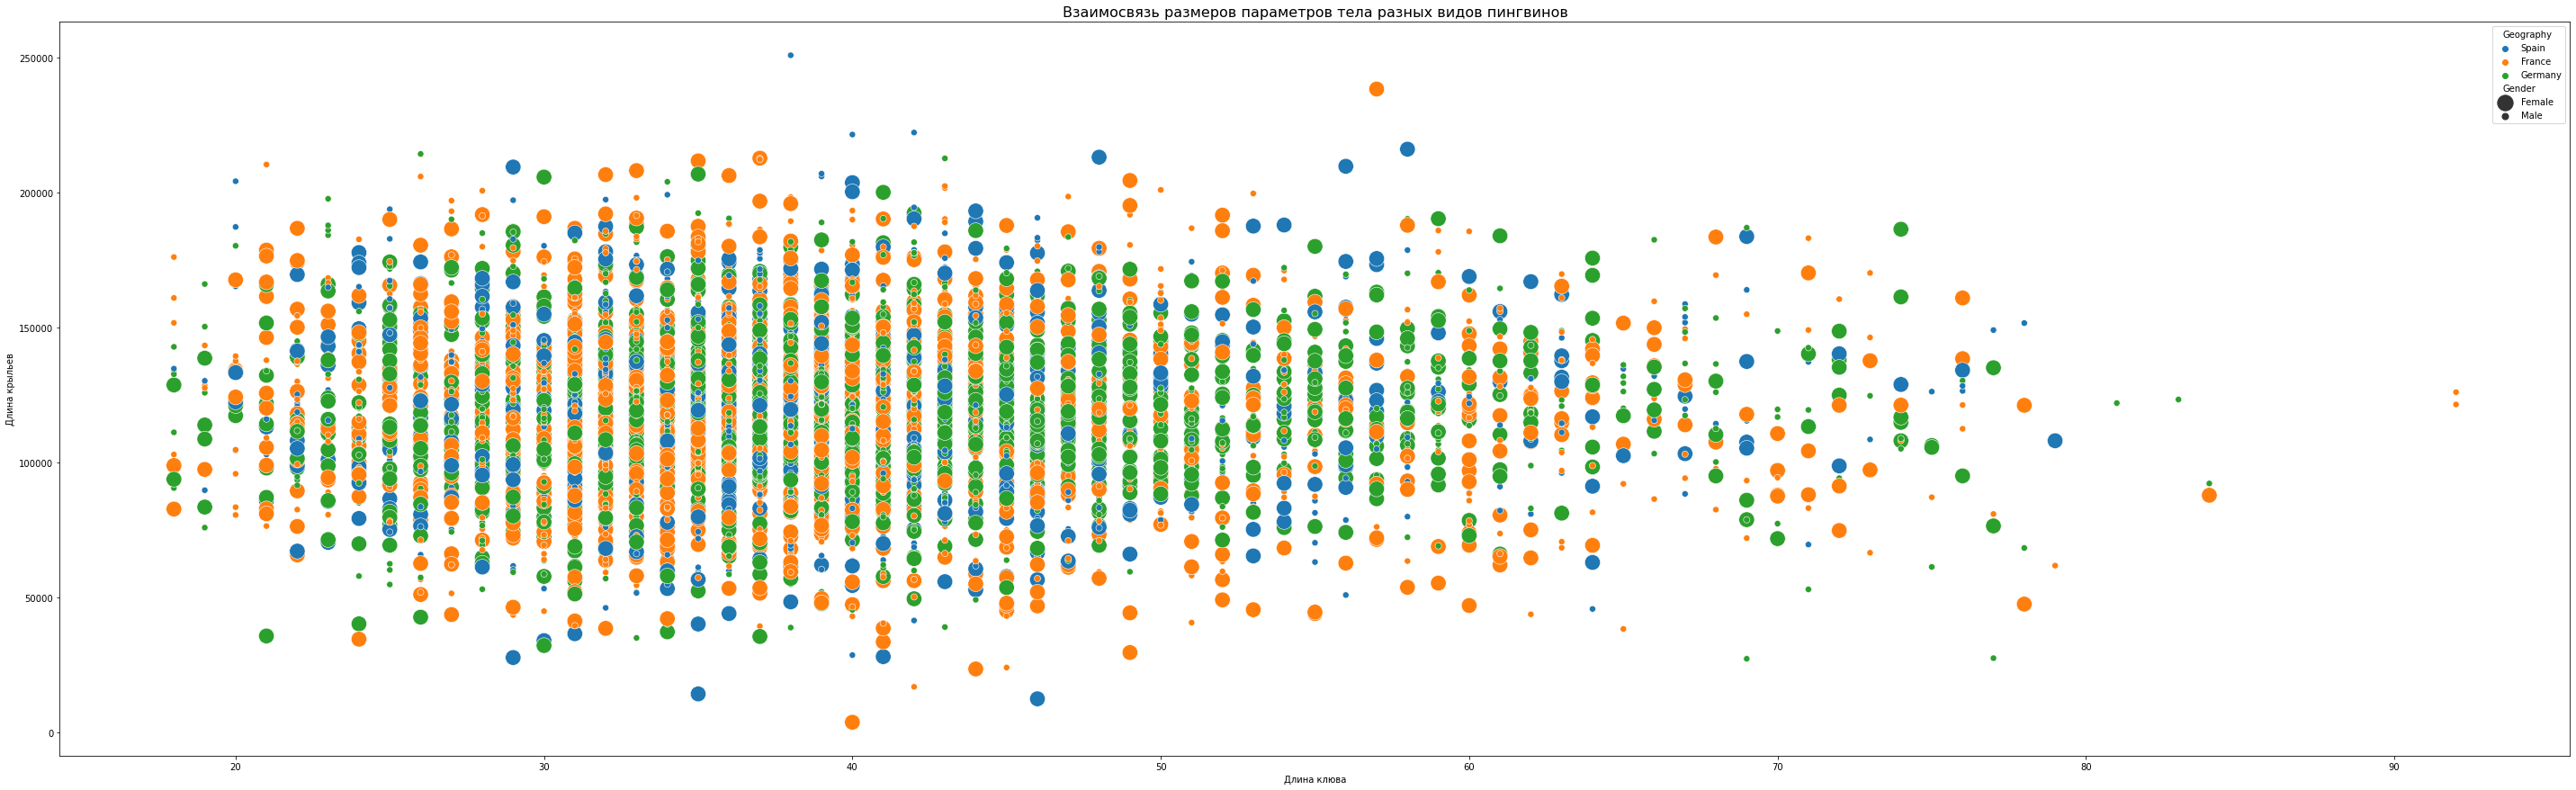

In [55]:


fig = plt.figure(figsize=(50, 15))

scatterplot = sns.scatterplot(
    data=churn_data_2500,
    x='Age',
    y='Balance',
    hue='Geography',
    s=100,
    size='Gender',
    sizes=(50, 300)

)
scatterplot.set_title('Взаимосвязь размеров параметров тела разных видов пингвинов', fontsize=16)
scatterplot.set_xlabel('Длина клюва')
scatterplot.set_ylabel('Длина крыльев')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

amazon_data = pd.read_csv('data/amazon_com.csv')

def replace_url(brand_name):
    if 'ref=' in brand_name:
        if 'Calvin' in brand_name:
            return 'Calvin-Klein'
        elif 'Wacoal' in brand_name:
            return 'Wacoal'
        else:
            return 'b.tempt'
    else:
        return brand_name
    
amazon_data['brand_name'] = amazon_data['brand_name'].apply(replace_url)
amazon_data['price'] = amazon_data['price'].str.replace('$', '').astype('float64')
amazon_data['brand_name'].unique()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
barplot1 = sns.barplot(
    data=amazon_data,
    x='brand_name',
    y='price',
    orient='v',
    ax = axes[0],
    ci=None
)
barplot1.tick_params(axis='x', rotation=70);
barplot1.set_title('Средняя стоимость товаров по брендам', fontsize=16);
barplot1.set_xlabel('Название бренда', fontsize=14);
barplot1.set_ylabel('Средняя цена', fontsize=14);
barplot1.grid()

barplot2 = sns.barplot(
    data=amazon_data,
    x='brand_name',
    y='price',
    hue='product_category',
    orient='v',
    ax = axes[1],
    ci=None,
    dodge=False
)
barplot2.tick_params(axis='x', rotation=70);
barplot2.set_title('Средняя стоимость товаров по брендам и категориям', fontsize=16);
barplot2.set_xlabel('Название бренда', fontsize=14);
barplot2.set_ylabel('Средняя цена', fontsize=14);
barplot2.grid()

In [ ]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

#визуализация главного графика
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = vacc_country.index, height = vacc_country);
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = vacc_country_per_hundred.index, height = vacc_country_per_hundred, width=0.5);
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)